### Importing Packages

In [239]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

import lightgbm as lgb

### Analyzing Data

In [276]:
bank_data=pd.read_csv("...../Kaggle/Banking/bank-additional-full.csv", delimiter=";")
bank_data.sample(3)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18288,32,management,single,university.degree,no,no,no,cellular,jul,wed,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
26205,44,admin.,single,professional.course,no,no,no,cellular,nov,thu,...,3,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
7712,45,blue-collar,divorced,basic.9y,no,yes,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no


In [242]:
# bank_data.columns
bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

There are no null values

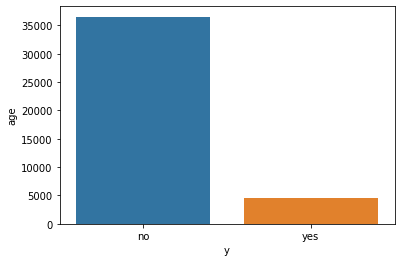

In [243]:
#Checking whether the data is balanced or unbalanced : distribution of class variable y
y_age=bank_data.groupby('y').age.count()
sns.barplot(y_age.index, y_age[:])

#The data is imbalanced 

In [284]:
# Identifying categorical and numerical variables

bank_data.columns

# Separating out Categorical and Numerical Variables
categorical_cols = []
num_cols = []

for variable in bank_data.columns:
    if bank_data[variable].dtype.name in ['object']:
        categorical_cols.append(variable)
    else:
        num_cols.append(variable)

# Missing Value treatment

for i in categorical_cols:
    a = bank_data[i].fillna('Missing')
    print("\nThe distinct categories of variable '{0}' is :\n ".format(i), a.value_counts(), '\n')
    
print("The conclusion is that none of the categorical or numerical variable requires missing values treatment \n")
nmiss_df = bank_data.isnull().sum(axis=0)
nmiss_df.name = 'NMiss'
pd.concat([bank_data.describe().T,nmiss_df], axis=1,join='inner')




The distinct categories of variable 'job' is :
  admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 


The distinct categories of variable 'marital' is :
  married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 


The distinct categories of variable 'education' is :
  university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 


The distinct categories of variable 'default' is :
  no         32588
unknown     8597
yes            3
Name: default, dtype: int64 


The distinct categories of variable 

,count,mean,std,min,25%,50%,75%,max,NMiss
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000,0
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000,0
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000,0
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000,0
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000,0
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400,0
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767,0
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900,0
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045,0
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100,0


#### Frequency analysis, Outlier

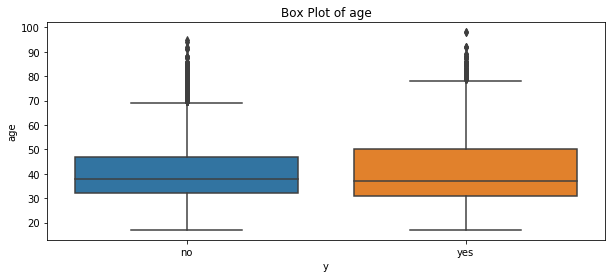

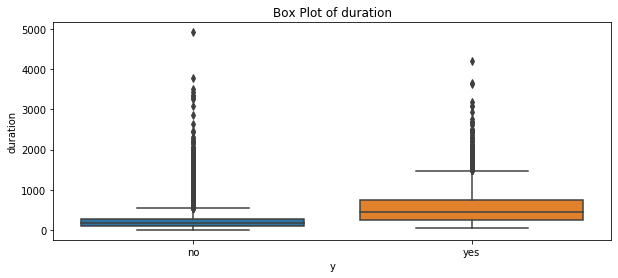

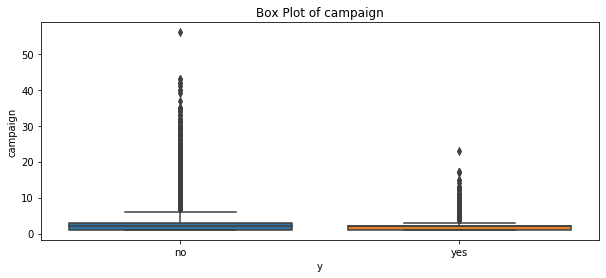

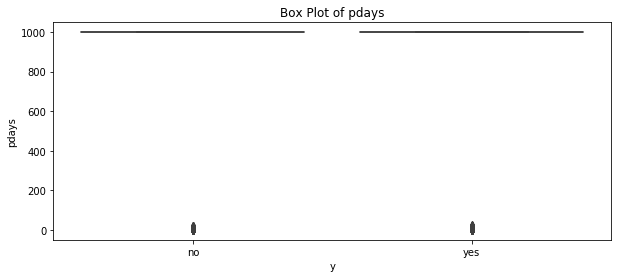

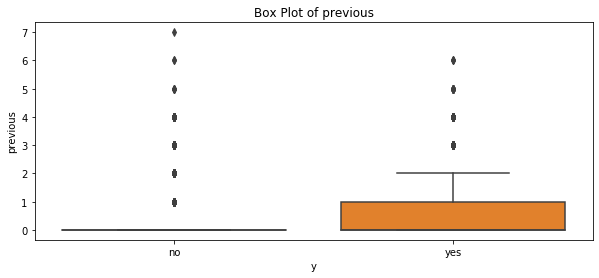

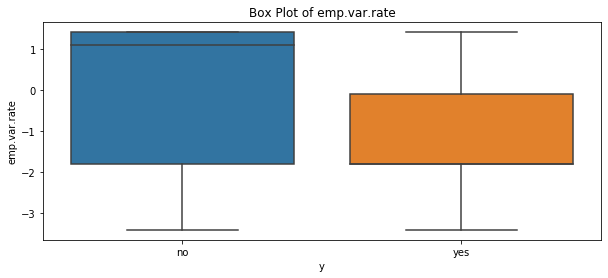

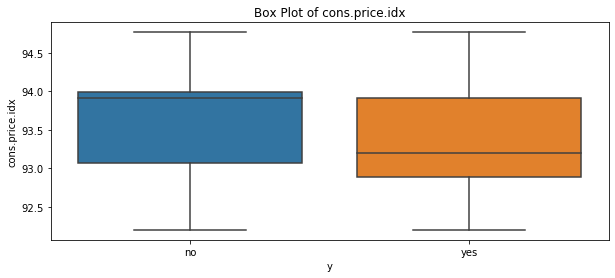

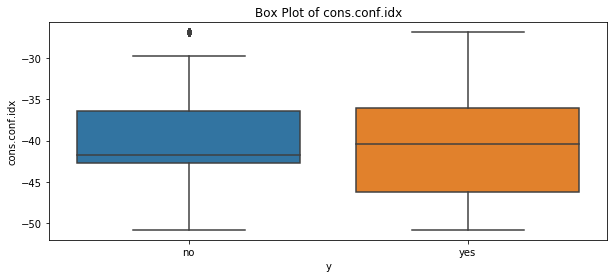

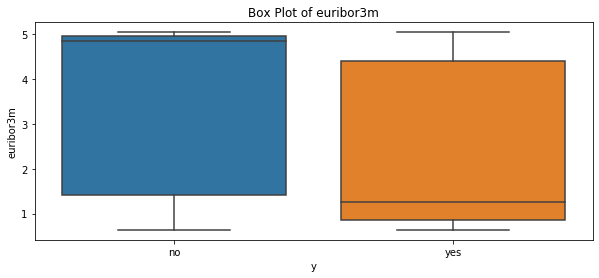

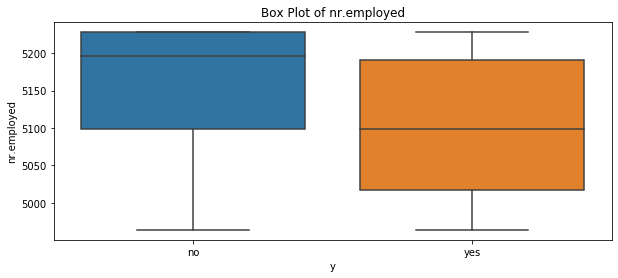

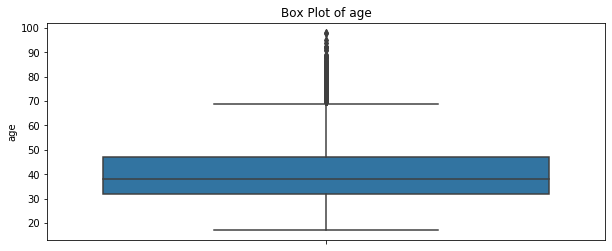

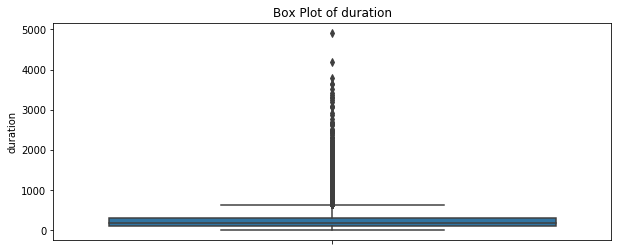

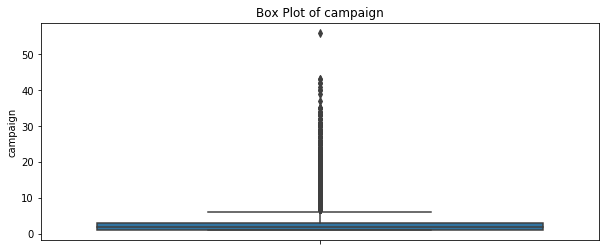

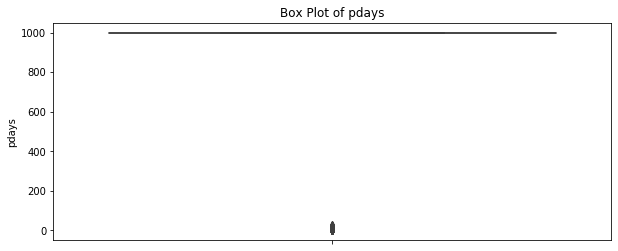

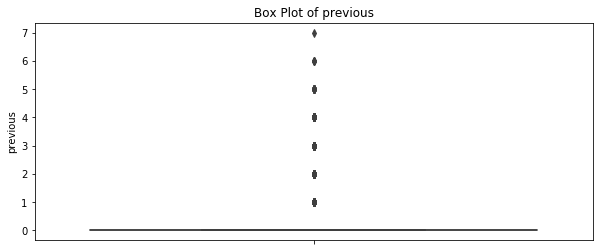

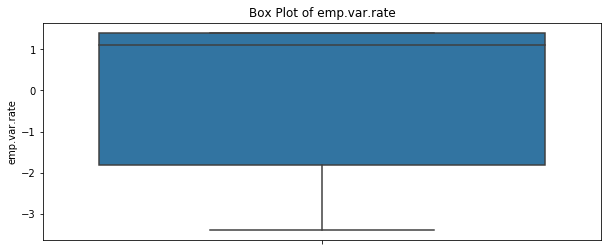

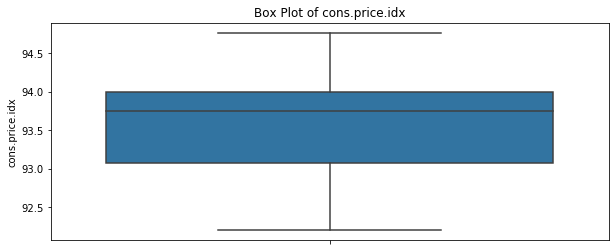

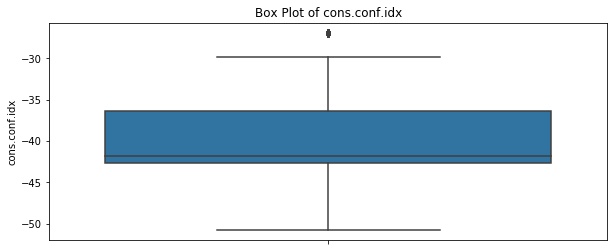

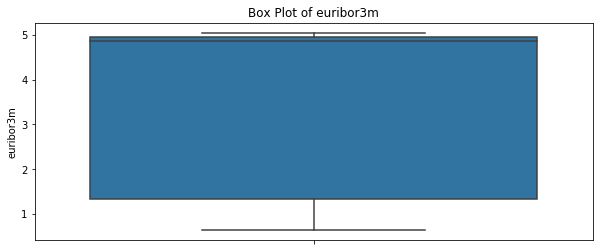

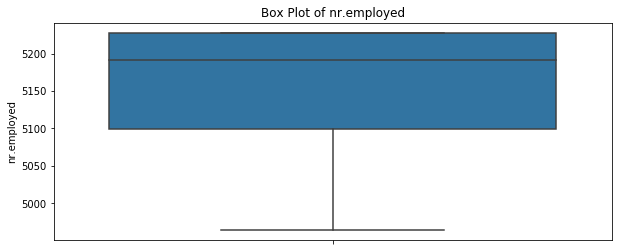

In [283]:

for num_variable in num_cols:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='y', y=num_variable, data = bank_data)
    plt.title(str('Box Plot of ') + str(num_variable))


for num_variable in num_cols:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(y=num_variable, data = bank_data)
    plt.title(str('Box Plot of ') + str(num_variable))


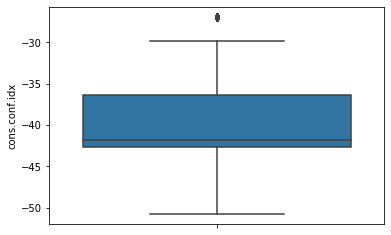

In [294]:
## only 'cons.conf.idx' requires outlier treatment
threshold=bank_data['cons.conf.idx'].quantile(0.99)
bank_data['cons.conf.idx'] =bank_data['cons.conf.idx'].clip(upper=threshold)

sns.boxplot(y="cons.conf.idx", data = bank_data)

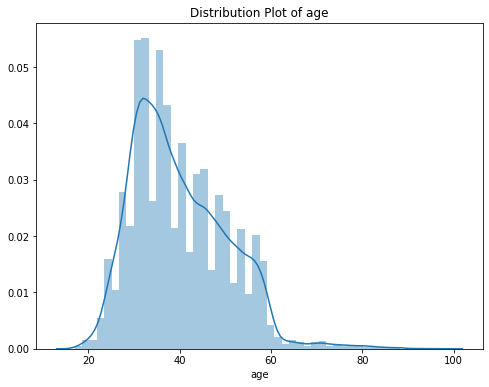

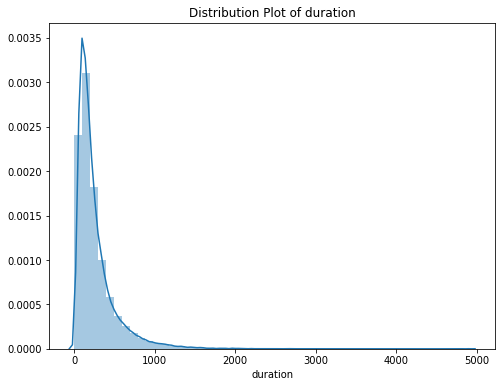

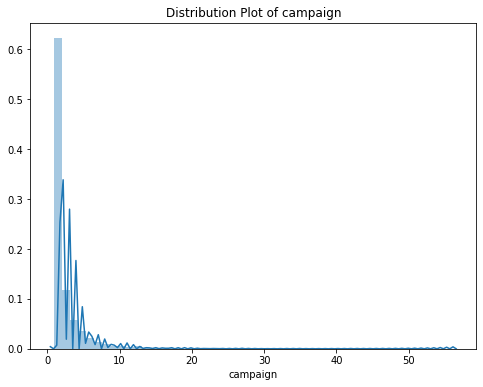

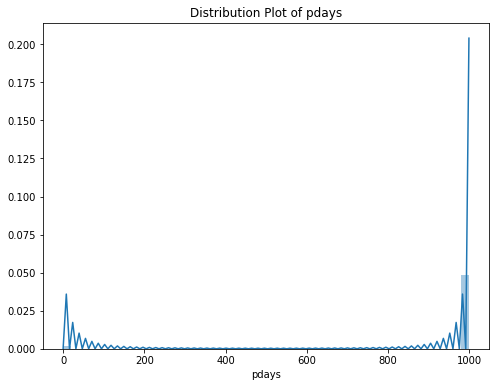

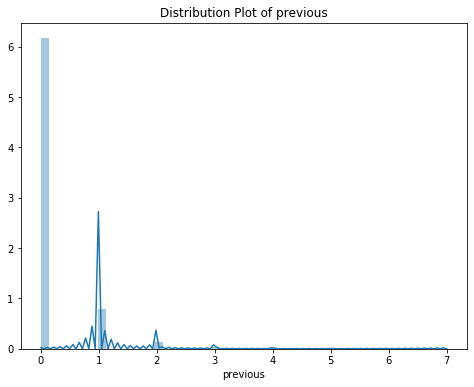

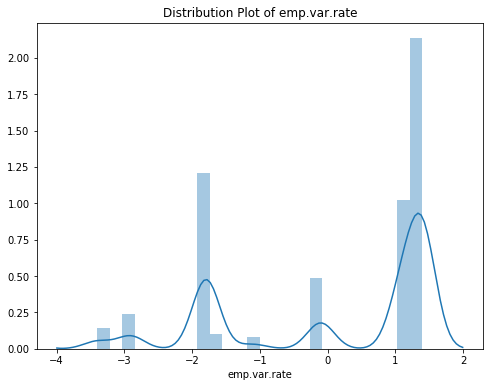

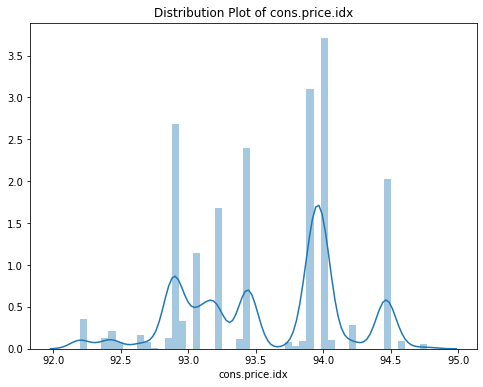

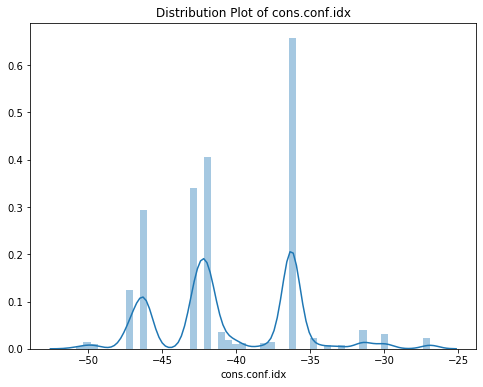

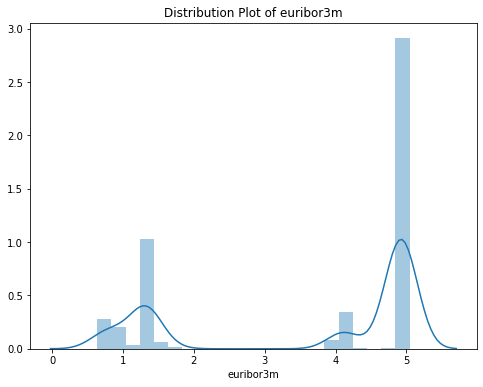

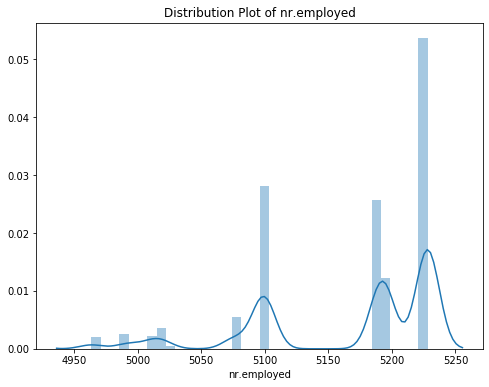

In [298]:
for num_variable in num_cols:
    plt.figure(figsize=(8,6))
    sns.distplot(bank_data[num_variable])
    plt.title(str('Distribution Plot of ') + str(num_variable))

In [315]:
# Univariate analysis of features (categorical variables)

# Defining a function which takes a feature and dataset as input and shows the countplot of the feature
def countplot(feature, dataset):
    plt.figure(figsize=(13,8))
    total = len(dataset[feature])*1.
    
    #Plotting ditribution of different categories of the feature in the dataset
    ax=sns.countplot(x=feature, data=dataset)
    
    # To show % contribution of each category of the feature
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.2, p.get_height()+5))
    
    # Rotating X labels for readibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.title(str('Count Plot of ') + str(feature))
    
    plt.show()



In [316]:
# Defining a function which takes a feature and dataset as input and shows the countplot of the feature with class information
%matplotlib inline

def countplot_withY(feature, dataset):
    plt.figure(figsize=(13,8))
    total = len(dataset[feature])*1.
    
    ax=sns.countplot(x=feature, data=dataset, hue="y")
    
    # To show % contribution of each category of the feature
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    # Rotating X labels for readibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.title(str('Count Plot of ') + str(feature) + str(' with Y'))
    
    plt.show()

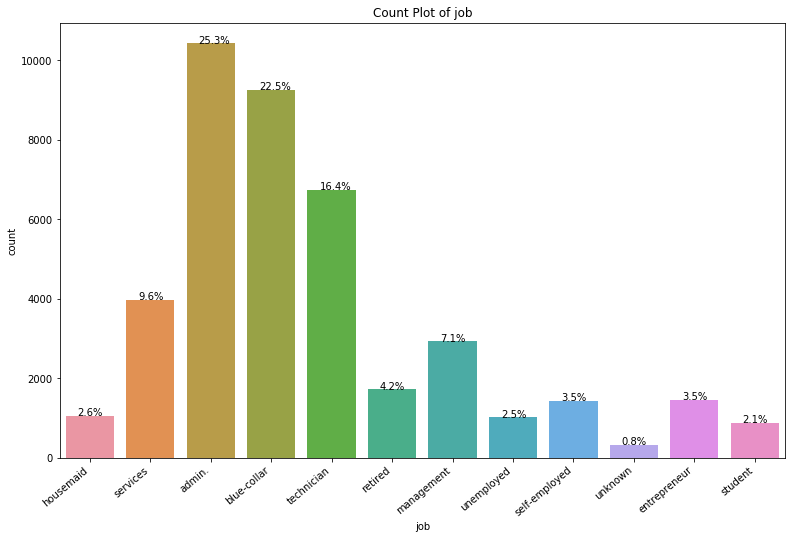

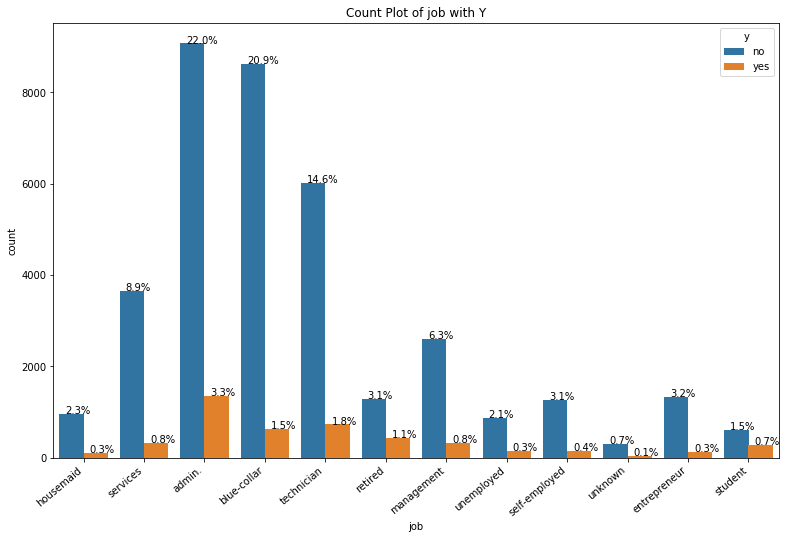

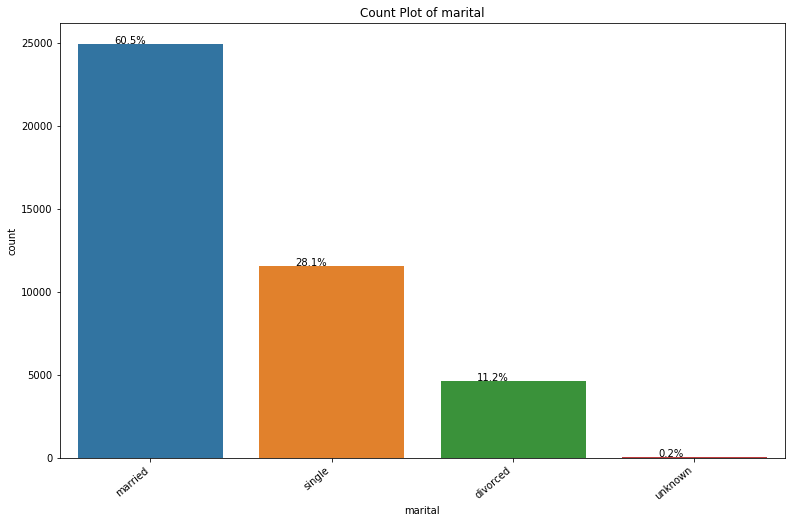

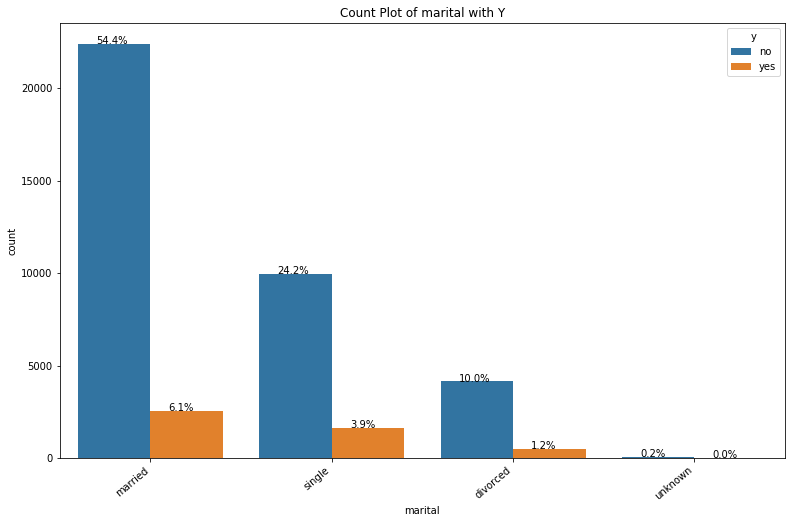

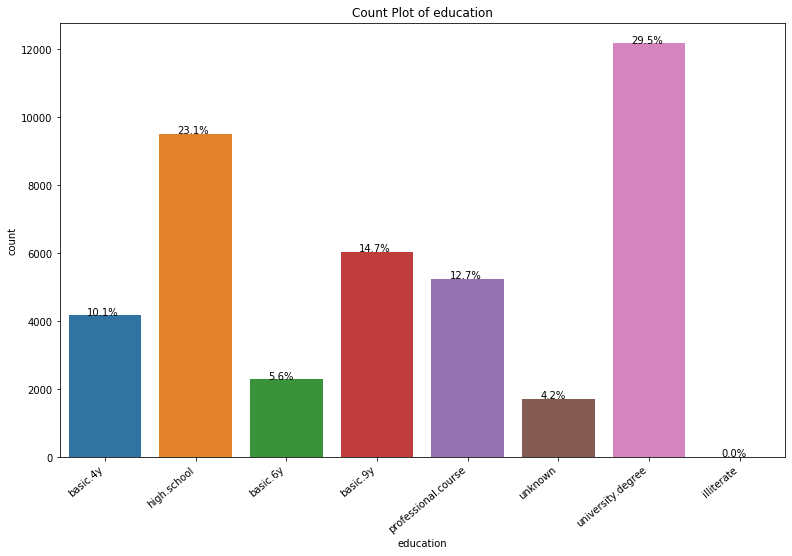

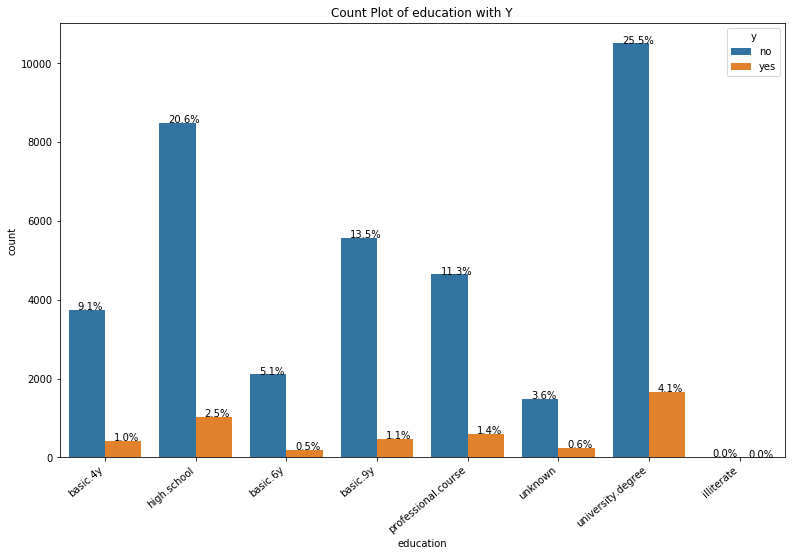

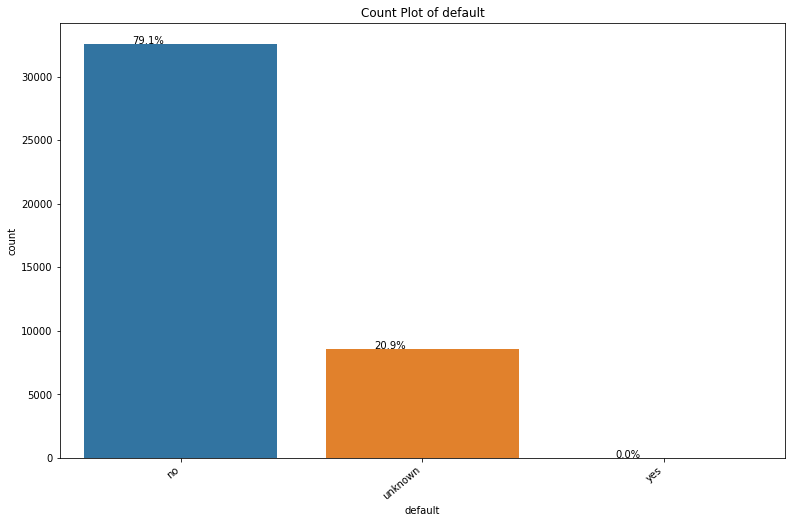

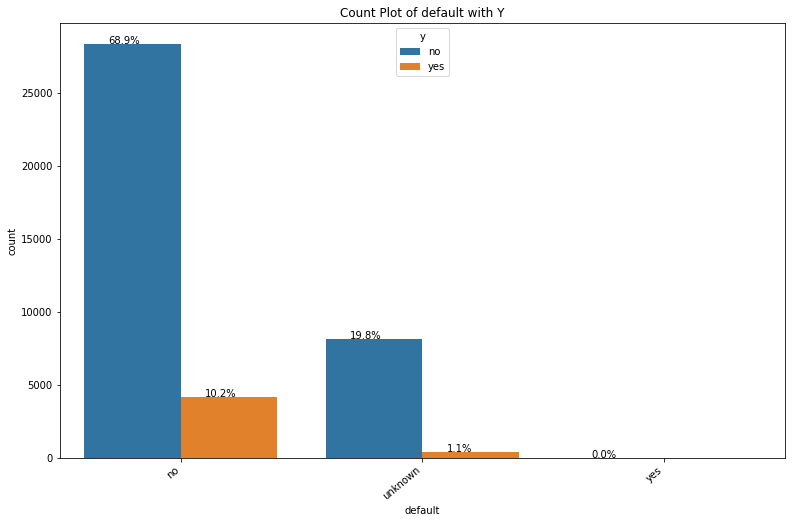

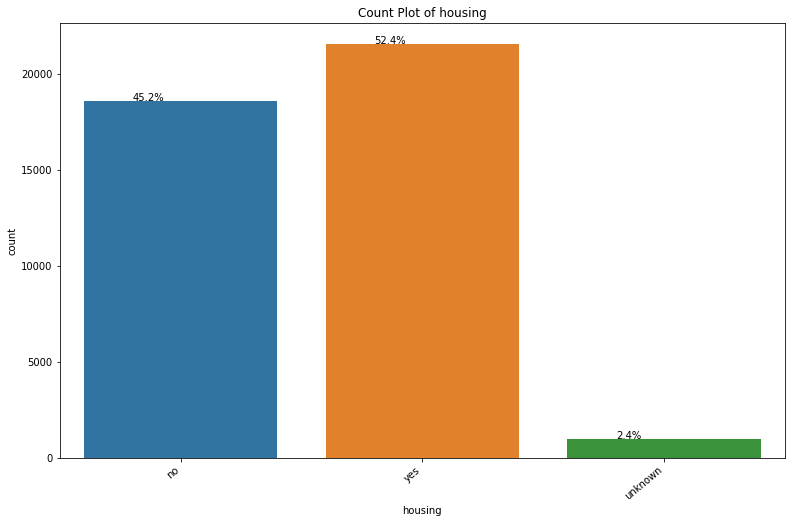

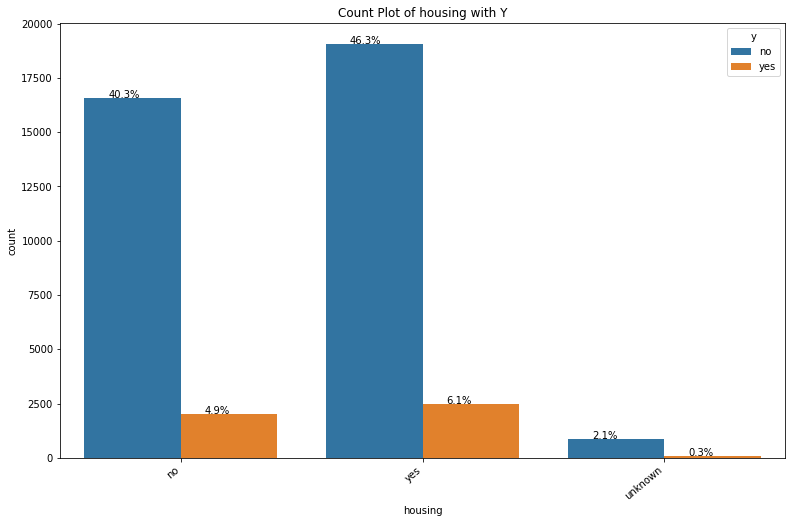

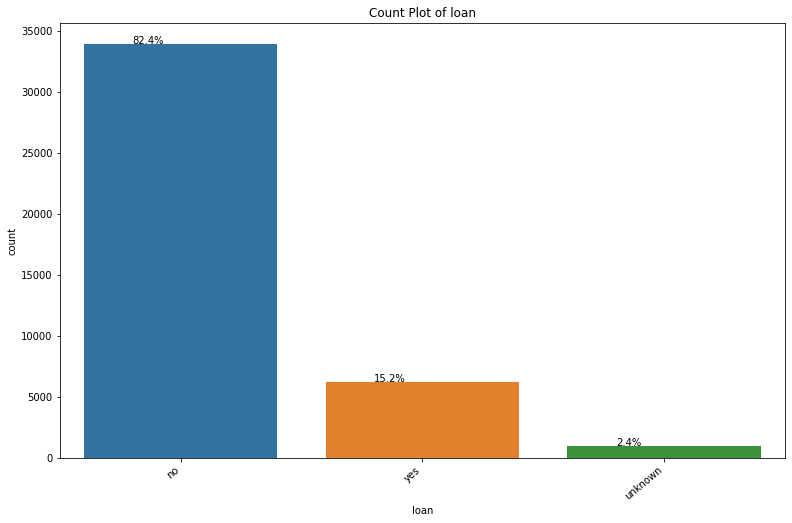

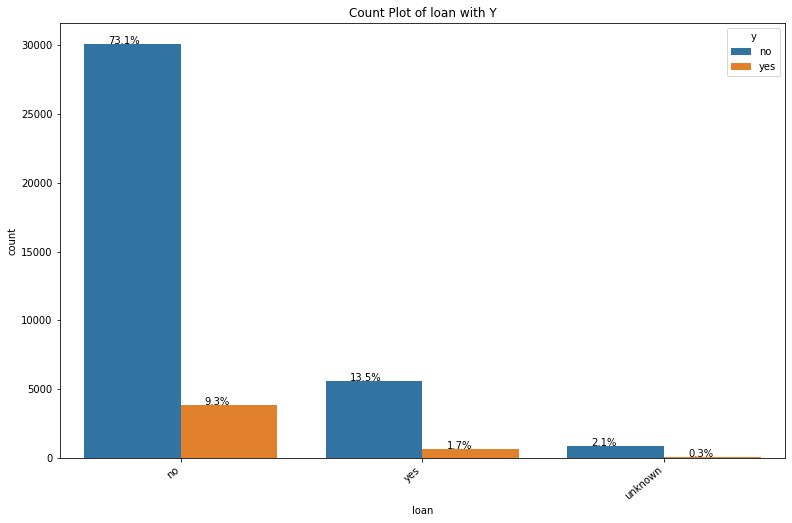

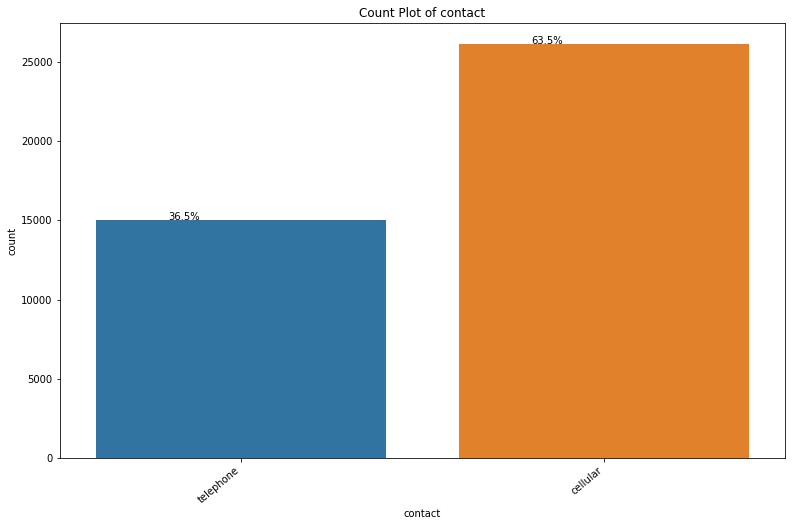

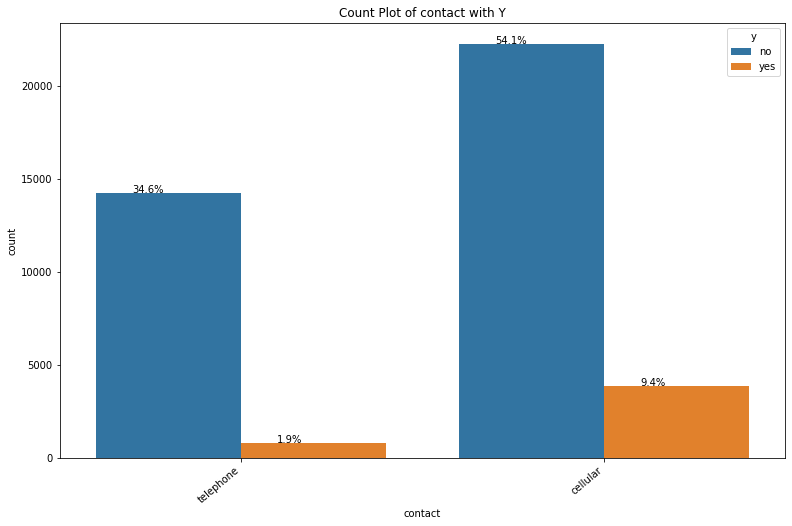

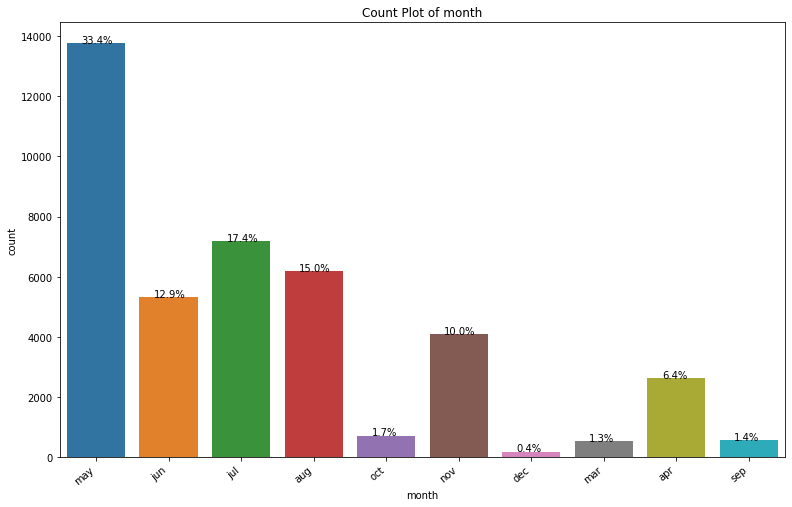

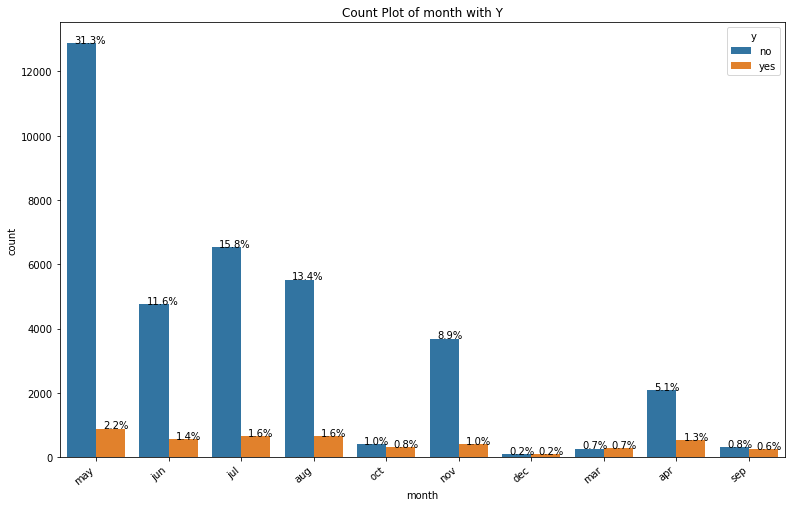

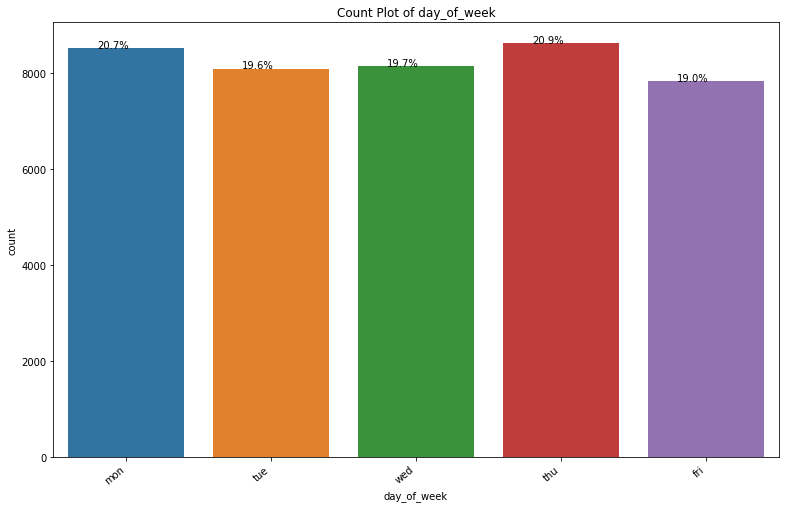

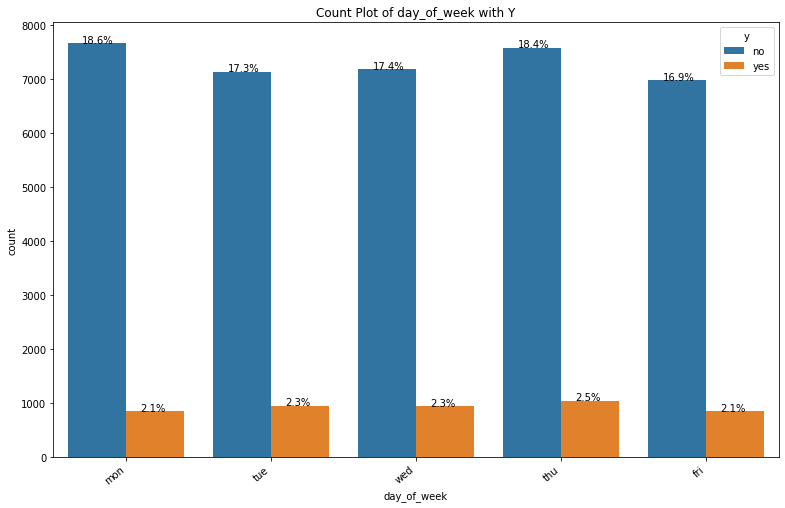

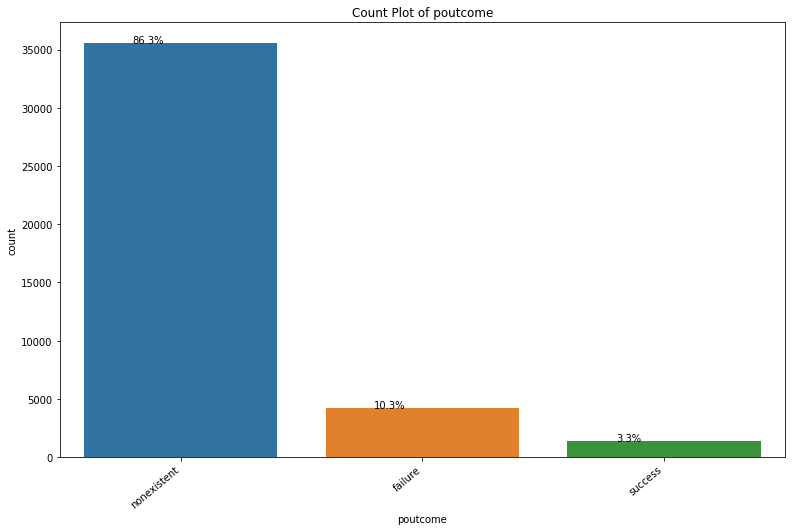

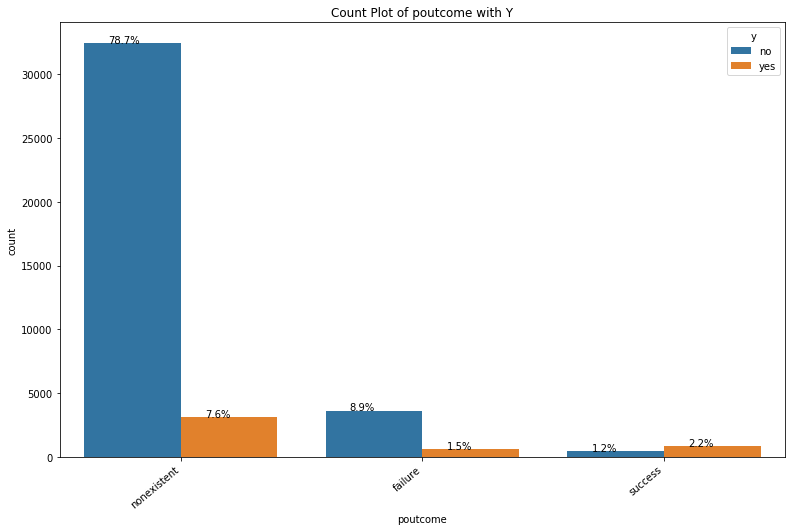

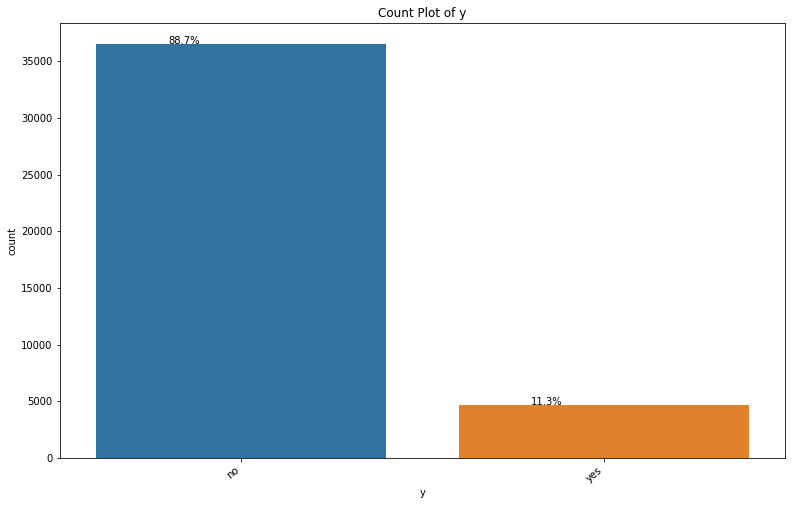

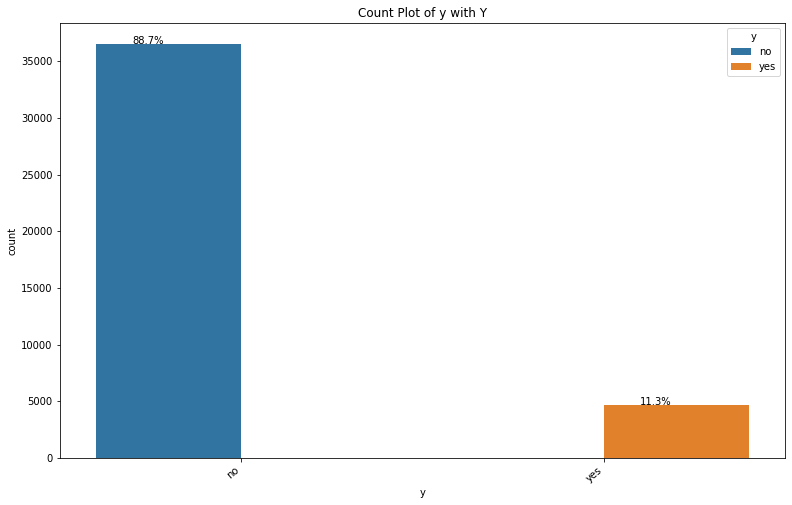

In [317]:
for variable in categorical_cols:
    countplot(variable, bank_data)
    countplot_withY(variable, bank_data)


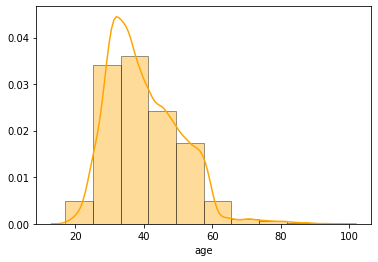

In [318]:
#Age:
sns.distplot(bank_data['age'], hist=True, kde=True, 
             bins=10, color = 'orange',
             hist_kws={'edgecolor':'black'})



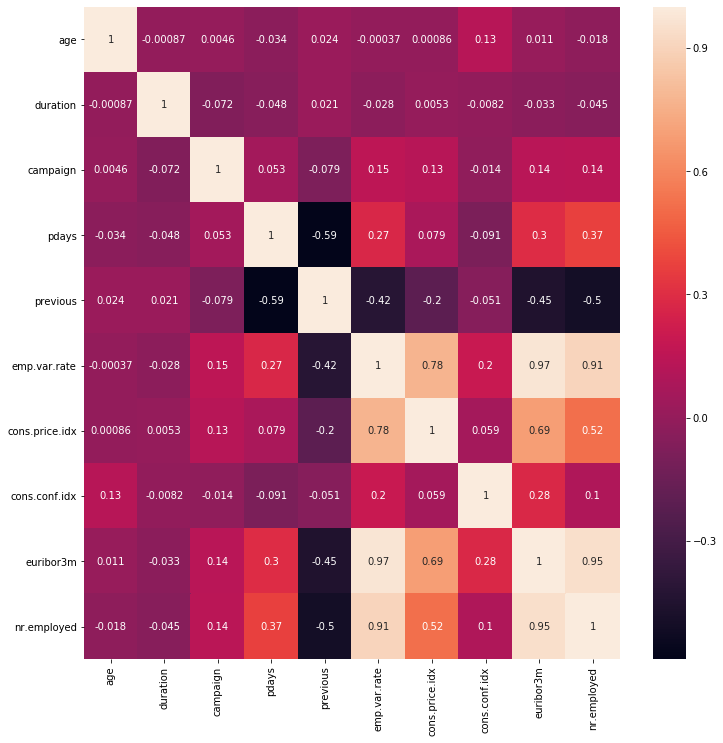

In [258]:
plt.subplots(figsize=(12, 12))
sns.heatmap(bank_data.corr(), annot=True)
plt.show()

In [ ]:
print('emp.var.rate is highly correlated with euribor3m, nr.employed and cons.conf.idx')

#### Dealing with duplicate data

In [259]:
data_dup = bank_data[bank_data.duplicated(keep="last")]
data_dup


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [260]:
bank_data.shape

(41188, 21)

In [261]:
bank_data=bank_data.drop_duplicates()
bank_data.shape

(41176, 21)

#### Separate independent and target variables

In [262]:
data_y= (bank_data['y'] == 'yes')*1
bank_data.drop('y', axis=1, inplace = True)
bank_data.shape

(41176, 20)

### Categorical to numerical 

In [263]:
# filter categorical columns using dtypes as objects and turn it into a list
categorical_cols = bank_data.columns[bank_data.dtypes==object].tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [264]:
from sklearn.preprocessing import LabelEncoder

bank_data_final=bank_data

for i in categorical_cols:
    le = LabelEncoder()
    bank_data_final[i] = le.fit_transform(bank_data_final[i])
print(bank_data_final.head())


   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1       261         1    999         0         1           1.1   
1            1       149         1    999         0         1           1.1   
2            1       226         1    999         0         1           1.1   
3            1       151         1    999         0         1           1.1   
4            1       307         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          93.9

##### Duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [265]:
#Drop feature duration
bank_data_final.drop("duration", axis=1, inplace=True)
bank_data_final.shape

(41176, 19)

### Split data  and  convert the training data into LightGBM dataset format 

In [266]:
data_train, data_test, y_train, y_test = train_test_split(bank_data_final, data_y, train_size = 0.7, test_size = 0.3)

In [267]:
lgb_train = lgb.Dataset(data=data_train, label=y_train,  free_raw_data=False)
#Creat Evaluation Dataset 
lgb_eval = lgb.Dataset(data=data_test, label=y_test, reference=lgb_train,  free_raw_data=False)

In [268]:
# Categorical index needed bacause lightgbm can handle categorical features very well
categorical_index = [1,2,3,4,5,6,7,8,9,13]
print('Categorical parametres: ' + str(data_train.columns[categorical_index].values))

Categorical parametres: ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


### Setting Training Parameters

In [269]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',      #Used ‘binary’ as objective --> this is classification problem)
    'metric': 'auc',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': -1
}

### Training Model

In [270]:
evals_result={}
gbm = lgb.train(params,
                lgb_train,
                valid_sets = lgb_eval,
                categorical_feature = categorical_index,
                num_boost_round= 150,
                early_stopping_rounds= 25,
                evals_result=evals_result)

[1]	valid_0's auc: 0.793784
Training until validation scores don't improve for 25 rounds
[2]	valid_0's auc: 0.796595
[3]	valid_0's auc: 0.797582
[4]	valid_0's auc: 0.798394
[5]	valid_0's auc: 0.799847
[6]	valid_0's auc: 0.801977
[7]	valid_0's auc: 0.802413
[8]	valid_0's auc: 0.802401
[9]	valid_0's auc: 0.802452
[10]	valid_0's auc: 0.803896
[11]	valid_0's auc: 0.803747
[12]	valid_0's auc: 0.804095
[13]	valid_0's auc: 0.804191
[14]	valid_0's auc: 0.803772
[15]	valid_0's auc: 0.803666
[16]	valid_0's auc: 0.803177
[17]	valid_0's auc: 0.80287
[18]	valid_0's auc: 0.803483
[19]	valid_0's auc: 0.803233
[20]	valid_0's auc: 0.802993
[21]	valid_0's auc: 0.803375
[22]	valid_0's auc: 0.803178

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 2, 3, 4, 5, 6, 7, 8, 9, 13]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))



[23]	valid_0's auc: 0.803885
[24]	valid_0's auc: 0.803569
[25]	valid_0's auc: 0.803184
[26]	valid_0's auc: 0.803387
[27]	valid_0's auc: 0.802878
[28]	valid_0's auc: 0.803181
[29]	valid_0's auc: 0.803217
[30]	valid_0's auc: 0.803461
[31]	valid_0's auc: 0.803694
[32]	valid_0's auc: 0.80365
[33]	valid_0's auc: 0.803854
[34]	valid_0's auc: 0.803918
[35]	valid_0's auc: 0.804083
[36]	valid_0's auc: 0.80393
[37]	valid_0's auc: 0.803754
[38]	valid_0's auc: 0.803601
Early stopping, best iteration is:
[13]	valid_0's auc: 0.804191


### Prediction 

In [271]:
y_pred = gbm.predict(data_test, num_iteration=gbm.best_iteration)

print('The Best iteration: ', gbm.best_iteration)
print('roc_auc_score:', roc_auc_score(y_test, y_pred))
print('accuracy_score:', accuracy_score(y_test, ( y_pred>= 0.5)*1))

The Best iteration:  13
roc_auc_score: 0.8041907963327826
accuracy_score: 0.8913624220837043


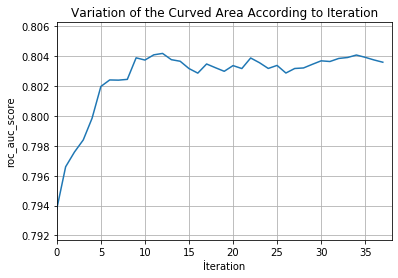

In [272]:
ax = lgb.plot_metric(evals_result, metric='auc')
ax.set_title('Variation of the Curved Area According to Iteration')
ax.set_xlabel('İteration')
ax.set_ylabel('roc_auc_score')
ax.legend_.remove()

Text(0, 0.5, 'Parametres')

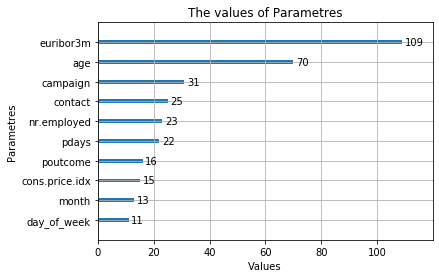

In [273]:
ax = lgb.plot_importance(gbm, max_num_features=10)
ax.set_title('The values of Parametres')
ax.set_xlabel('Values')
ax.set_ylabel('Parametres')